## Exploratory Data Analysis

## Total EVs

Data_Year                 0
Quarter               10034
County                    0
FUEL_TYPE                 0
MAKE                      0
MODEL                     0
Number of Vehicles        0
dtype: int64
4199
4199


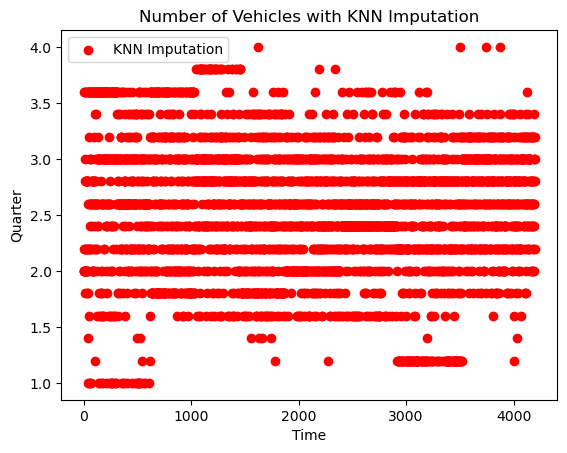

    Data_Year Quarter  Number of Vehicles
0        2010      Q1                   4
1        2010      Q2                 358
2        2010      Q3                 108
3        2010      Q4                  12
4        2011      Q1                  71
5        2011      Q2                2981
6        2011      Q3                1995
7        2011      Q4                  32
8        2012      Q1                  52
9        2012      Q2                3244
10       2012      Q3                1721
11       2012      Q4                 138
12       2013      Q1                2274
13       2013      Q2                6943
14       2013      Q3               11865
15       2013      Q4                  85
16       2014      Q1                1620
17       2014      Q2               15656
18       2014      Q3               12030
19       2014      Q4                 214
20       2015      Q1                   0
21       2015      Q2               20488
22       2015      Q3             

In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Loading data
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/Total EV in California.xlsx'

# Read data from sheet "County"
df5 = pd.read_excel(file_path, sheet_name='County')

num_rows = len(df5)
null_counts = df5.isnull().sum()
print(null_counts)

# Filter the data by the values 'Electric' in the 'FUEL_TYPE' column
filtered_df5 = df5[df5['FUEL_TYPE'].isin(['Electric'])]

# Exclude rows with the year 2024
cleaned_df5 = filtered_df5[filtered_df5['Data_Year'] != 2024]

# Keep only 'Data_Year', 'Quarter', and 'Number of Vehicles' columns
final5 = cleaned_df5[['Data_Year', 'Quarter', 'Number of Vehicles']]

# Exclude data between 1998 and 2009
final5 = final5[(final5['Data_Year'] < 1998) | (final5['Data_Year'] > 2009)]

# Resetting index after filtering
final5 = final5.reset_index(drop=True)

# Replace quarter values with numeric values
final5['Quarter'] = final5['Quarter'].replace({'Q4': 4, 'Q3': 3, 'Q2': 2, 'Q1': 1})

# Create a copy to avoid modifying the original DataFrame
df_imputed = final5[['Data_Year', 'Quarter', 'Number of Vehicles']].copy()

# Identify rows with missing 'Quarter' values
missing_quarter_indices = df_imputed[df_imputed['Quarter'].isna()].index

# Define features for KNN Imputer
features = ['Number of Vehicles', 'Data_Year']
feature_matrix = df_imputed[features].values

# Use the KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_matrix = imputer.fit_transform(df_imputed)

# Update the DataFrame with imputed 'Quarter' values
df_imputed.loc[missing_quarter_indices, 'Quarter'] = imputed_matrix[missing_quarter_indices, df_imputed.columns.get_loc('Quarter')]

# Verify lengths
print(len(missing_quarter_indices))
print(len(df_imputed.loc[missing_quarter_indices, 'Quarter']))

# Plot the results
plt.scatter(missing_quarter_indices, df_imputed.loc[missing_quarter_indices, 'Quarter'], color='red', label='KNN Imputation')
plt.title('Number of Vehicles with KNN Imputation')
plt.xlabel('Time')
plt.ylabel('Quarter')
plt.legend()
plt.show()

# Round and replace the numeric quarter values back to string format
df_imputed['Quarter'] = round(df_imputed['Quarter'], 0)
df_imputed['Quarter'] = df_imputed['Quarter'].replace({4: 'Q4', 3: 'Q3', 2: 'Q2', 1: 'Q1'})

# Sum the 'Number of Vehicles' for each 'Data_Year' and 'Quarter' combination
df_imputed = df_imputed.groupby(['Data_Year', 'Quarter'])['Number of Vehicles'].sum().reset_index()

# Create a MultiIndex DataFrame with all combinations of years and quarters
years = df_imputed['Data_Year'].unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
full_index = pd.MultiIndex.from_product([years, quarters], names=['Data_Year', 'Quarter'])

# Set the index of the imputed DataFrame and reindex with the full index
df_imputed.set_index(['Data_Year', 'Quarter'], inplace=True)
quarterly_ev_totals = df_imputed.reindex(full_index, fill_value=0).reset_index()

# Display the quarterly totals
print(quarterly_ev_totals)


## Total EV charging stations

In [4]:
import pandas as pd

# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/alt_fuel_stations (Jun 30 2024).csv'

# Read data from the CSV file
df4 = pd.read_csv(file_path)

# Select only the desired columns
filtered_data4 = df4[['Fuel Type Code', 'Open Date', 'Groups With Access Code','Latitude', 'Longitude','ZIP','State']]

# Filter out rows where "Groups With Access Code" is "TEMPORARILY UNAVAILABLE (Public)"
filtered_data4 = filtered_data4[filtered_data4['Groups With Access Code'] != 'TEMPORARILY UNAVAILABLE (Public)']

# Check and convert the "Open Date" column to datetime format
filtered_data4['Open Date'] = pd.to_datetime(filtered_data4['Open Date'], errors='coerce')

# Filter out dates before 2010 and after 2023
filtered_data4 = filtered_data4[
    (filtered_data4['Open Date'] >= '2010-01-01') & 
    (filtered_data4['Open Date'] <= '2023-12-31')
]

# Add columns for year and quarter
filtered_data4['Year'] = filtered_data4['Open Date'].dt.year
filtered_data4['Quarter'] = filtered_data4['Open Date'].dt.quarter

# Group by year and quarter and count the number of entries
stations_quarterly_counts = filtered_data4.groupby(['Year', 'Quarter']).size().reset_index(name='Charging Stations Count')

# Create a MultiIndex DataFrame with all combinations of years and quarters
years = range(2010, 2024)
quarters = [1, 2, 3, 4]
full_index = pd.MultiIndex.from_product([years, quarters], names=['Year', 'Quarter'])

# Set the index of the counts DataFrame and reindex with the full index
stations_quarterly_counts.set_index(['Year', 'Quarter'], inplace=True)
stations_quarterly_counts = stations_quarterly_counts.reindex(full_index, fill_value=0).reset_index()

# Display the quarterly counts
print(stations_quarterly_counts)

filtered_data4

    Year  Quarter  Charging Stations Count
0   2010        1                        1
1   2010        2                        1
2   2010        3                        0
3   2010        4                        2
4   2011        1                       77
5   2011        2                        1
6   2011        3                        5
7   2011        4                       25
8   2012        1                       43
9   2012        2                       22
10  2012        3                       17
11  2012        4                       15
12  2013        1                       44
13  2013        2                       20
14  2013        3                       28
15  2013        4                       21
16  2014        1                       35
17  2014        2                       34
18  2014        3                       64
19  2014        4                       65
20  2015        1                       80
21  2015        2                      117
22  2015   

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_21843/1918557585.py:7: DtypeWarning: Columns (6,20,31,46,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(file_path)


Fuel Type Code  Open Date            Groups With Access Code   Latitude  \
3               ELEC 2012-12-11                Public - Call ahead  34.221665   
8               ELEC 2012-05-04                             Public  33.763700   
13              ELEC 2011-12-12                             Public  33.824004   
17              ELEC 2019-04-08                             Public  34.010021   
23              ELEC 2019-11-01                             Public  38.599693   
...              ...        ...                                ...        ...   
17481           ELEC 2023-12-13  Public - Credit card at all times  33.631220   
17482           ELEC 2023-12-14  Public - Credit card at all times  33.197868   
17483           ELEC 2023-12-21  Public - Credit card at all times  33.684440   
17484           ELEC 2023-12-28  Public - Credit card at all times  32.803100   
17496           ELEC 2023-12-01                             Public  38.640470   

        Longitude      ZIP State  Year  Quarter  
3     -118.468371  91343.0    CA  2012        4  
8     -118.192000  90802.0    CA  2012        2  
13    -116.543589  92262.0    CA  2011        4  
17    -118.495830  90405.0    CA  2019        2  
23    -121.427045  95815.0    CA  2019        4  
...           ...      ...   ...   ...      ...  
17481 -117.721790    92618    CA  2023        4  
17482 -117.249153    92083    CA  2023        4  
17483 -117.989420    92648    CA  2023        4  
17484 -116.973260    92020    CA  2023        4  
17496 -122.873710    95448    CA  2023        4  

[14874 rows x 9 columns]

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

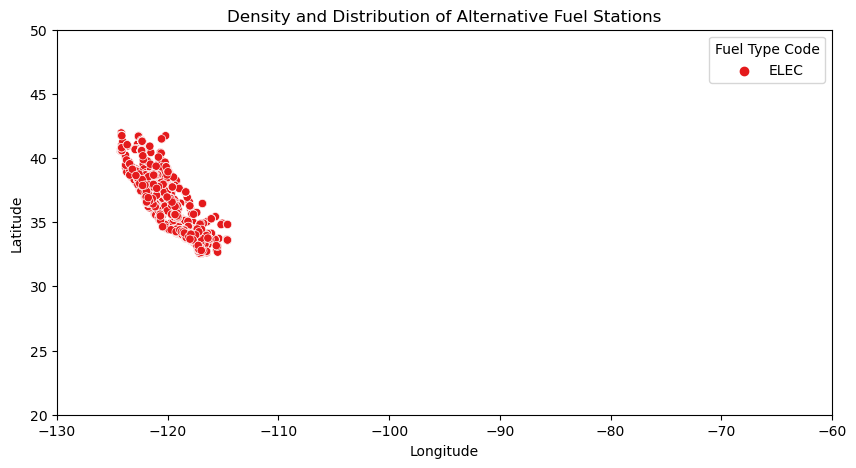

In [5]:
import seaborn as sns

# Plotting the scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Longitude', y='Latitude', data=filtered_data4, hue='Fuel Type Code', palette='Set1')
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.title('Density and Distribution of Alternative Fuel Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type Code')
plt.show()

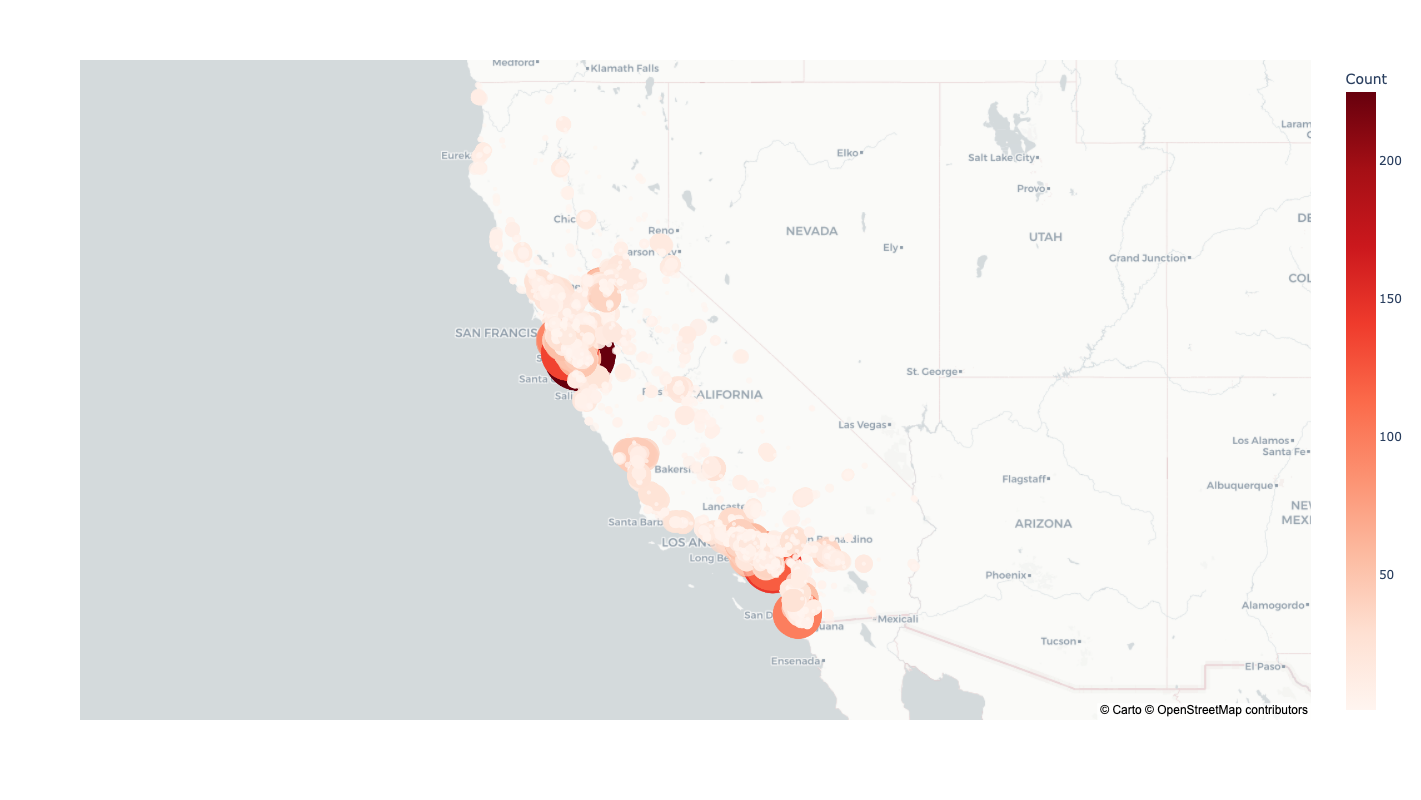

In [6]:
import pandas as pd


# Filter data for California
data_ca = filtered_data4[filtered_data4['State'] == 'CA']
# Count the number of stations per ZIP code in California
zip_counts_ca = data_ca['ZIP'].value_counts().reset_index()
zip_counts_ca.columns = ['ZIP', 'Count']
# Merge the counts with original data to get latitude and longitude for each ZIP
merged_data_ca = pd.merge(data_ca[['ZIP', 'Latitude', 'Longitude']].drop_duplicates(), zip_counts_ca, on='ZIP')
import plotly.express as px

# Make sure you have a valid Mapbox access token
mapbox_token = 'your_mapbox_token'  # Replace with your Mapbox access token
px.set_mapbox_access_token(mapbox_token)

# Create a scatter mapbox for California
fig = px.scatter_mapbox(merged_data_ca,
                        lat='Latitude',
                        lon='Longitude',
                        color='Count',
                        size='Count',
                        color_continuous_scale="reds",
                        size_max=50,
                        zoom=5,  # Adjust zoom level to focus on California
                        center={"lat": 36.7783, "lon": -119.4179},  # Center on California
                        mapbox_style="carto-positron",
                        hover_name='ZIP',
                        hover_data={'Latitude': True, 'Longitude': True, 'Count': True}
                       )
# Adjust the layout to make the map larger
fig.update_layout(
    width=1200,  # Set the width to a larger size
    height=800   # Set the height to a larger size
)

# Show the map
fig.show()



## Fuel Price

In [7]:
# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/fuel.xlsx'

# Read sheet "Data1" and skip the first 3 rows
df2 = pd.read_excel(file_path, sheet_name='Data 1', skiprows=2)

# Select columns 'Date' and 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'
df2 = df2[['Date', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']]

# Format 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Delete years before 2010 and after 2023
df2 = df2[(df2['Date'].dt.year >= 2010) & (df2['Date'].dt.year <= 2023)]

# Set up column 'Date' as index
df2.set_index('Date', inplace=True)

# Averaged by quarter
fuel_quarterly_mean = df2.resample('Q').mean()
# Đưa cột 'Date' trở lại làm cột bình thường
fuel_quarterly_mean_reset = fuel_quarterly_mean.reset_index()

# Delete 'Date' column
fuel_quarterly_mean_no_date = fuel_quarterly_mean_reset.drop(columns=['Date'])

# Display the results
print(fuel_quarterly_mean_no_date)



    U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0                                            2.764000                           
1                                            2.858333                           
2                                            2.774000                           
3                                            2.938000                           
4                                            3.342333                           
5                                            3.849000                           
6                                            3.689333                           
7                                            3.425000                           
8                                            3.662333                           
9                                            3.781667                           
10                                           3.729333                           
11                          

## Electricity Price

In [8]:
import pandas as pd

# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/electricity.xlsx'

# Read sheet "Data1" and skip the first 3 lines
df1 = pd.read_excel(file_path, skiprows=10)
# Rename column
df1 = df1.rename(columns={'APU000072610': 'Electricity Price'})

# Format observation_date to datetime
df1['observation_date'] = pd.to_datetime(df1['observation_date'])

# Filter rows that satisfy the observation_date condition from 2010 to 2023
df_filtered1 = df1[(df1['observation_date'].dt.year >= 2010) & (df1['observation_date'].dt.year <= 2023)]

# Group data by year and quarter, calculate the average value of Electricity Price
df_filtered1['year'] = df_filtered1['observation_date'].dt.year
df_filtered1['quarter'] = df_filtered1['observation_date'].dt.quarter

# Calculate the average value for each year and quarter
electricity_df_avg = df_filtered1.groupby(['year', 'quarter']).agg({'Electricity Price': 'mean'}).reset_index()

# Print the results 
electricity_df_avg

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_21843/3130644793.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_21843/3130644793.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



year  quarter  Electricity Price
0   2010        1           0.124000
1   2010        2           0.128333
2   2010        3           0.132667
3   2010        4           0.125667
4   2011        1           0.125667
5   2011        2           0.130000
6   2011        3           0.135000
7   2011        4           0.128333
8   2012        1           0.127667
9   2012        2           0.130333
10  2012        3           0.133000
11  2012        4           0.127333
12  2013        1           0.128667
13  2013        2           0.132000
14  2013        3           0.137000
15  2013        4           0.131000
16  2014        1           0.134333
17  2014        2           0.136667
18  2014        3           0.142333
19  2014        4           0.135000
20  2015        1           0.137333
21  2015        2           0.139000
22  2015        3           0.141667
23  2015        4           0.134333
24  2016        1           0.134000
25  2016        2           0.135000
26  2016        3           0.139000
27  2016        4           0.132667
28  2017        1           0.134333
29  2017        2           0.138000
30  2017        3           0.142333
31  2017        4           0.136333
32  2018        1           0.135000
33  2018        2           0.136333
34  2018        3           0.138667
35  2018        4           0.135000
36  2019        1           0.135333
37  2019        2           0.136667
38  2019        3           0.139333
39  2019        4           0.134000
40  2020        1           0.134000
41  2020        2           0.134667
42  2020        3           0.137000
43  2020        4           0.135667
44  2021        1           0.137000
45  2021        2           0.140333
46  2021        3           0.143667
47  2021        4           0.142000
48  2022        1           0.148333
49  2022        2           0.155000
50  2022        3           0.166000
51  2022        4           0.164667
52  2023        1           0.167333
53  2023        2           0.166667
54  2023        3           0.170000
55  2023        4           0.168667

## Personal Income

In [9]:
import pandas as pd

# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/personal_income.xlsx'

# Read the Excel file and skip the first 10 rows
df = pd.read_excel(file_path, skiprows=10)

# Rename column
df = df.rename(columns={'CAOTOT': 'Personal Income'})

# Convert observation_date column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Filter rows that satisfy the observation_date condition from 2010 to 2023
df_filtered = df[(df['observation_date'].dt.year >= 2010) & (df['observation_date'].dt.year <= 2023)]

# Group data by year and quarter, calculate the average value of Electricity Price
df_filtered['year'] = df_filtered['observation_date'].dt.year
df_filtered['quarter'] = df_filtered['observation_date'].dt.quarter

# Select only the columns 'year', 'quarter', and 'Personal Income'
personal_income_avg = df_filtered[['year','observation_date', 'quarter', 'Personal Income']].reset_index(drop=True)

# Print the results
personal_income_avg

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_21843/78295164.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_21843/78295164.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



year observation_date  quarter  Personal Income
0   2010       2010-01-01        1        1576815.7
1   2010       2010-04-01        2        1604032.1
2   2010       2010-07-01        3        1609613.5
3   2010       2010-10-01        4        1649528.6
4   2011       2011-01-01        1        1696444.5
5   2011       2011-04-01        2        1704323.9
6   2011       2011-07-01        3        1725292.8
7   2011       2011-10-01        4        1727650.9
8   2012       2012-01-01        1        1775723.2
9   2012       2012-04-01        2        1796915.4
10  2012       2012-07-01        3        1794568.1
11  2012       2012-10-01        4        1891845.4
12  2013       2013-01-01        1        1801626.6
13  2013       2013-04-01        2        1833423.1
14  2013       2013-07-01        3        1851647.7
15  2013       2013-10-01        4        1876843.6
16  2014       2014-01-01        1        1902645.1
17  2014       2014-04-01        2        1937630.9
18  2014       2014-07-01        3        1976434.3
19  2014       2014-10-01        4        2006161.7
20  2015       2015-01-01        1        2055502.8
21  2015       2015-04-01        2        2089561.3
22  2015       2015-07-01        3        2111103.4
23  2015       2015-10-01        4        2132030.8
24  2016       2016-01-01        1        2160710.9
25  2016       2016-04-01        2        2174042.2
26  2016       2016-07-01        3        2202555.5
27  2016       2016-10-01        4        2227243.5
28  2017       2017-01-01        1        2251305.9
29  2017       2017-04-01        2        2278666.9
30  2017       2017-07-01        3        2307389.9
31  2017       2017-10-01        4        2342831.9
32  2018       2018-01-01        1        2359551.7
33  2018       2018-04-01        2        2395471.8
34  2018       2018-07-01        3        2430234.3
35  2018       2018-10-01        4        2458962.7
36  2019       2019-01-01        1        2500309.9
37  2019       2019-04-01        2        2527505.3
38  2019       2019-07-01        3        2542313.3
39  2019       2019-10-01        4        2581673.9
40  2020       2020-01-01        1        2620751.8
41  2020       2020-04-01        2        2782204.5
42  2020       2020-07-01        3        2853265.6
43  2020       2020-10-01        4        2813863.6
44  2021       2021-01-01        1        3097752.7
45  2021       2021-04-01        2        2972063.1
46  2021       2021-07-01        3        2997363.9
47  2021       2021-10-01        4        2987527.9
48  2022       2022-01-01        1        2969021.5
49  2022       2022-04-01        2        2979888.0
50  2022       2022-07-01        3        3018949.2
51  2022       2022-10-01        4        3058730.5
52  2023       2023-01-01        1        3083103.9
53  2023       2023-04-01        2        3123601.1
54  2023       2023-07-01        3        3145936.9
55  2023       2023-10-01        4        3155988.4

In [10]:
# Extract the 'column_name' column from each DataFrame
col1 = quarterly_ev_totals['Number of Vehicles']
col2 = stations_quarterly_counts['Charging Stations Count']
col3 = fuel_quarterly_mean_no_date['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']
col4 = electricity_df_avg['Electricity Price']
col5 = personal_income_avg['Personal Income']
col6 = personal_income_avg['year']
col7 = personal_income_avg['quarter']

# Concatenate the columns into a single DataFrame
merged_df = pd.concat([col6, col7, col1, col2, col3, col4, col5], axis=1)

# Name the columns in the new DataFrame
merged_df.columns = ['Year', 'Quarter', 'Number of Vehicles', 'Charging Stations Count', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Electricity Price', 'Personal Income']

# Display the resulting DataFrame
merged_df

Year  Quarter  Number of Vehicles  Charging Stations Count  \
0   2010        1                   4                        1   
1   2010        2                 358                        1   
2   2010        3                 108                        0   
3   2010        4                  12                        2   
4   2011        1                  71                       77   
5   2011        2                2981                        1   
6   2011        3                1995                        5   
7   2011        4                  32                       25   
8   2012        1                  52                       43   
9   2012        2                3244                       22   
10  2012        3                1721                       17   
11  2012        4                 138                       15   
12  2013        1                2274                       44   
13  2013        2                6943                       20   
14  2013        3               11865                       28   
15  2013        4                  85                       21   
16  2014        1                1620                       35   
17  2014        2               15656                       34   
18  2014        3               12030                       64   
19  2014        4                 214                       65   
20  2015        1                   0                       80   
21  2015        2               20488                      117   
22  2015        3               17446                       83   
23  2015        4                 435                       73   
24  2016        1                4232                       85   
25  2016        2               18212                       56   
26  2016        3               14759                       65   
27  2016        4                 426                       62   
28  2017        1                1598                       63   
29  2017        2               17256                       64   
30  2017        3               26682                       51   
31  2017        4                 436                       79   
32  2018        1                   0                      170   
33  2018        2               32390                       86   
34  2018        3               61392                      112   
35  2018        4                1266                       77   
36  2019        1                2434                      108   
37  2019        2               23770                       82   
38  2019        3               68079                      125   
39  2019        4                 320                      123   
40  2020        1                2547                      311   
41  2020        2               38056                     1679   
42  2020        3               65104                      204   
43  2020        4                 239                      254   
44  2021        1               32752                     3813   
45  2021        2               37335                      373   
46  2021        3               43337                      461   
47  2021        4               46842                      643   
48  2022        1               59364                      531   
49  2022        2               58946                      738   
50  2022        3               65204                      640   
51  2022        4               78562                      593   
52  2023        1               85580                      578   
53  2023        2              102602                      723   
54  2023        3               99980                      519   
55  2023        4               86506                      533   

    U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  \
0                                            2.764000                              
1                                            2.858333                    

In [11]:

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Year                                                                          56 non-null     int32  
 1   Quarter                                                                       56 non-null     int32  
 2   Number of Vehicles                                                            56 non-null     int64  
 3   Charging Stations Count                                                       56 non-null     int64  
 4   U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  56 non-null     float64
 5   Electricity Price                                                             56 non-null     float64
 6   Personal Income                      

In [12]:
merged_df.to_excel('merged_df.xlsx', index=False)


# Get descriptive statistics for all numerical variables
merged_df.describe()

Year    Quarter  Number of Vehicles  Charging Stations Count  \
count    56.00000  56.000000           56.000000                56.000000   
mean   2016.50000   2.500000        22785.357143               265.607143   
std       4.06761   1.128152        29803.664450               565.182020   
min    2010.00000   1.000000            0.000000                 0.000000   
25%    2013.00000   1.750000          409.000000                34.750000   
50%    2016.50000   2.500000         5587.500000                78.000000   
75%    2020.00000   3.250000        37515.250000               268.250000   
max    2023.00000   4.000000       102602.000000              3813.000000   

       U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  \
count                                          56.000000                              
mean                                            3.068917                              
std                                             0.606905                              
min                                             2.000000                              
25%                                             2.612333                              
50%                                             2.940667                              
75%                                             3.635667                              
max                                             4.596667                              

       Electricity Price  Personal Income  
count          56.000000     5.600000e+01  
mean            0.138756     2.313003e+06  
std             0.011336     5.000642e+05  
min             0.124000     1.576816e+06  
25%             0.132917     1.870545e+06  
50%             0.135500     2.239275e+06  
75%             0.139583     2.790119e+06  
max             0.170000     3.155988e+06

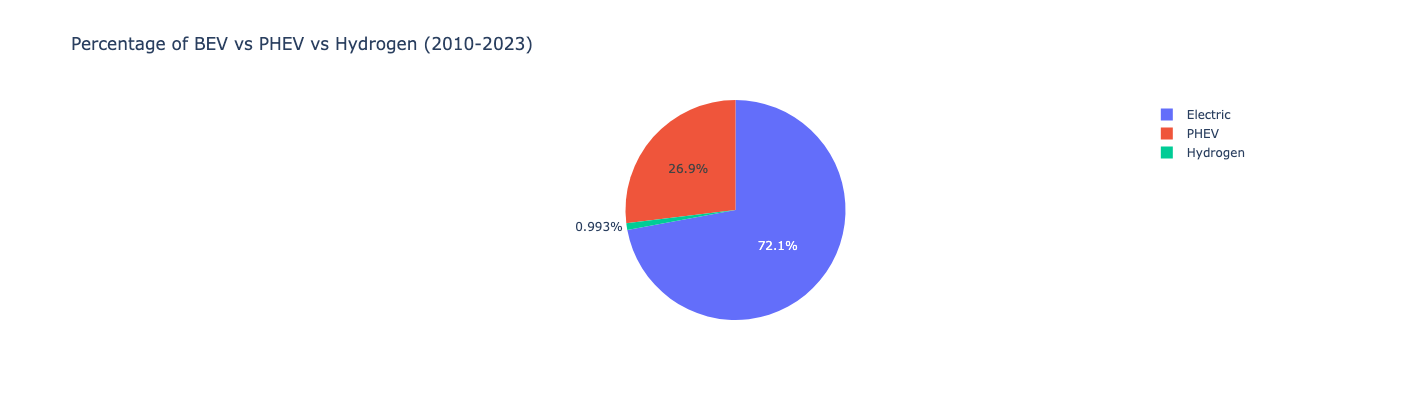

In [13]:
#Percentage of BEV vs PHEV

import plotly.express as px

# Filter for years 2010 to 2023
filtered_years_df5 = df5[(df5['Data_Year'] >= 2010) & (df5['Data_Year'] <= 2023)]

# Filter for relevant fuel types
filtered_df5 = filtered_years_df5[filtered_years_df5['FUEL_TYPE'].isin(['Electric', 'PHEV', 'Hydrogen'])]

# Calculate the count of each type
vehicle_counts = filtered_df5.groupby('FUEL_TYPE')['Number of Vehicles'].sum()

# Compute the percentage of each type
total_vehicles = vehicle_counts.sum()
percentages = (vehicle_counts / total_vehicles) * 100

# Prepare data for the pie chart
vehicle_types = percentages.index
values = percentages.values

# Create a pie chart
fig = px.pie(names=vehicle_types, values=values, title='Percentage of BEV vs PHEV vs Hydrogen (2010-2023)', height=400)
fig.show()


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



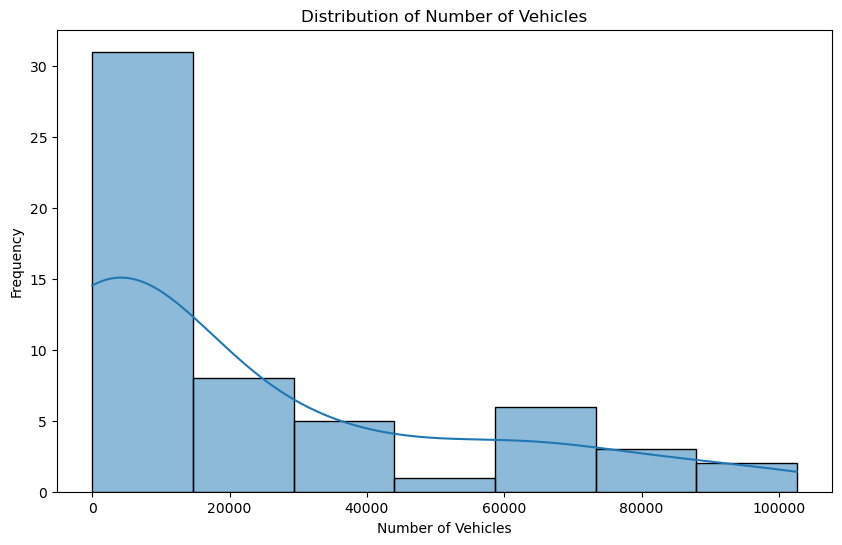

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



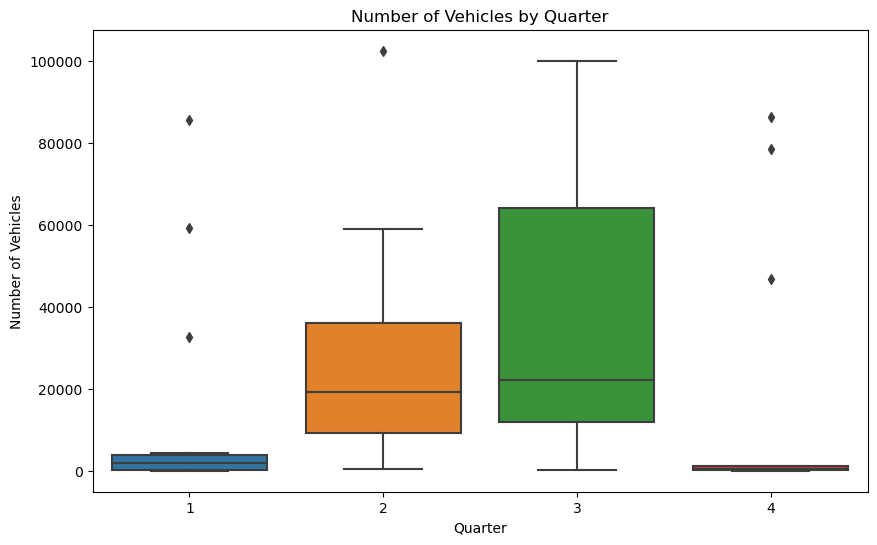

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



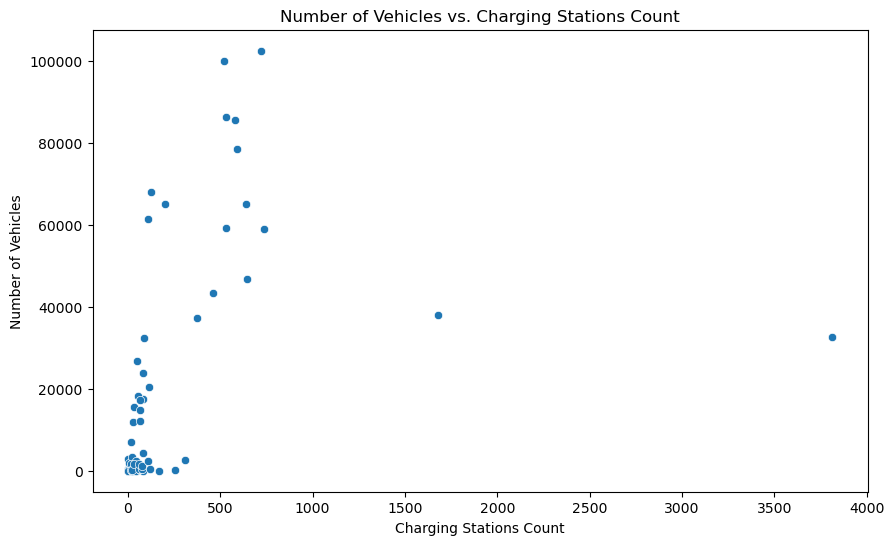

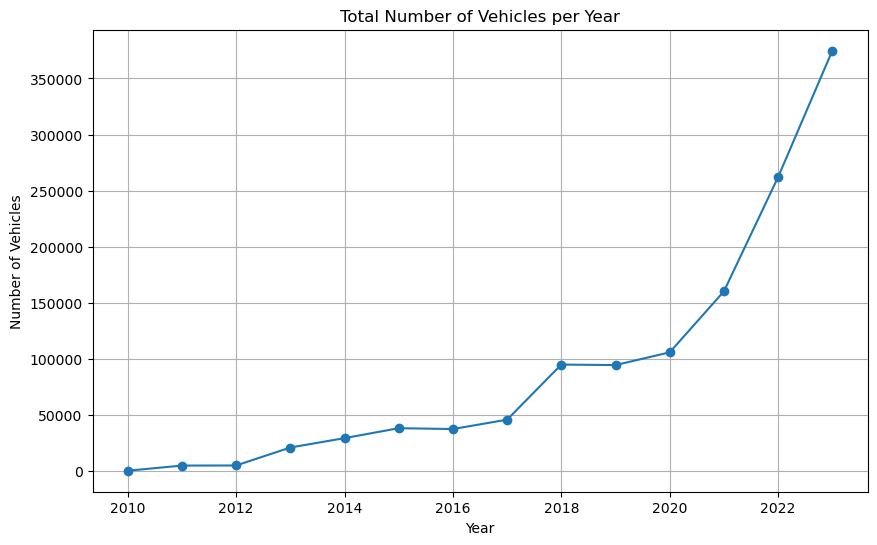

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



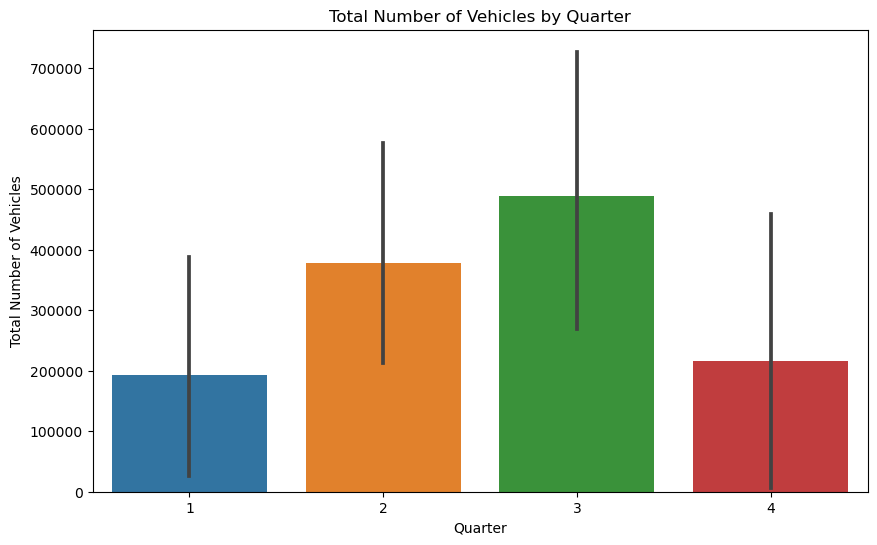

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for electric vehicles
electric_vehicles_df = filtered_df5[filtered_df5['FUEL_TYPE'] == 'Electric']

# 1. Histograms and Density Plots
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Number of Vehicles'], kde=True)
plt.title('Distribution of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Number of Vehicles', data=merged_df)
plt.title('Number of Vehicles by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Vehicles')
plt.show()

# 3. Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Stations Count', y='Number of Vehicles', data=merged_df)
plt.title('Number of Vehicles vs. Charging Stations Count')
plt.xlabel('Charging Stations Count')
plt.ylabel('Number of Vehicles')
plt.show()

# 4. Line Plots

df_yearly = merged_df.groupby('Year')['Number of Vehicles'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly['Year'], df_yearly['Number of Vehicles'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Total Number of Vehicles per Year')
plt.grid(True)
plt.show()

# 5. Bar Plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Number of Vehicles', data=merged_df, estimator=sum)
plt.title('Total Number of Vehicles by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Number of Vehicles')
plt.show()


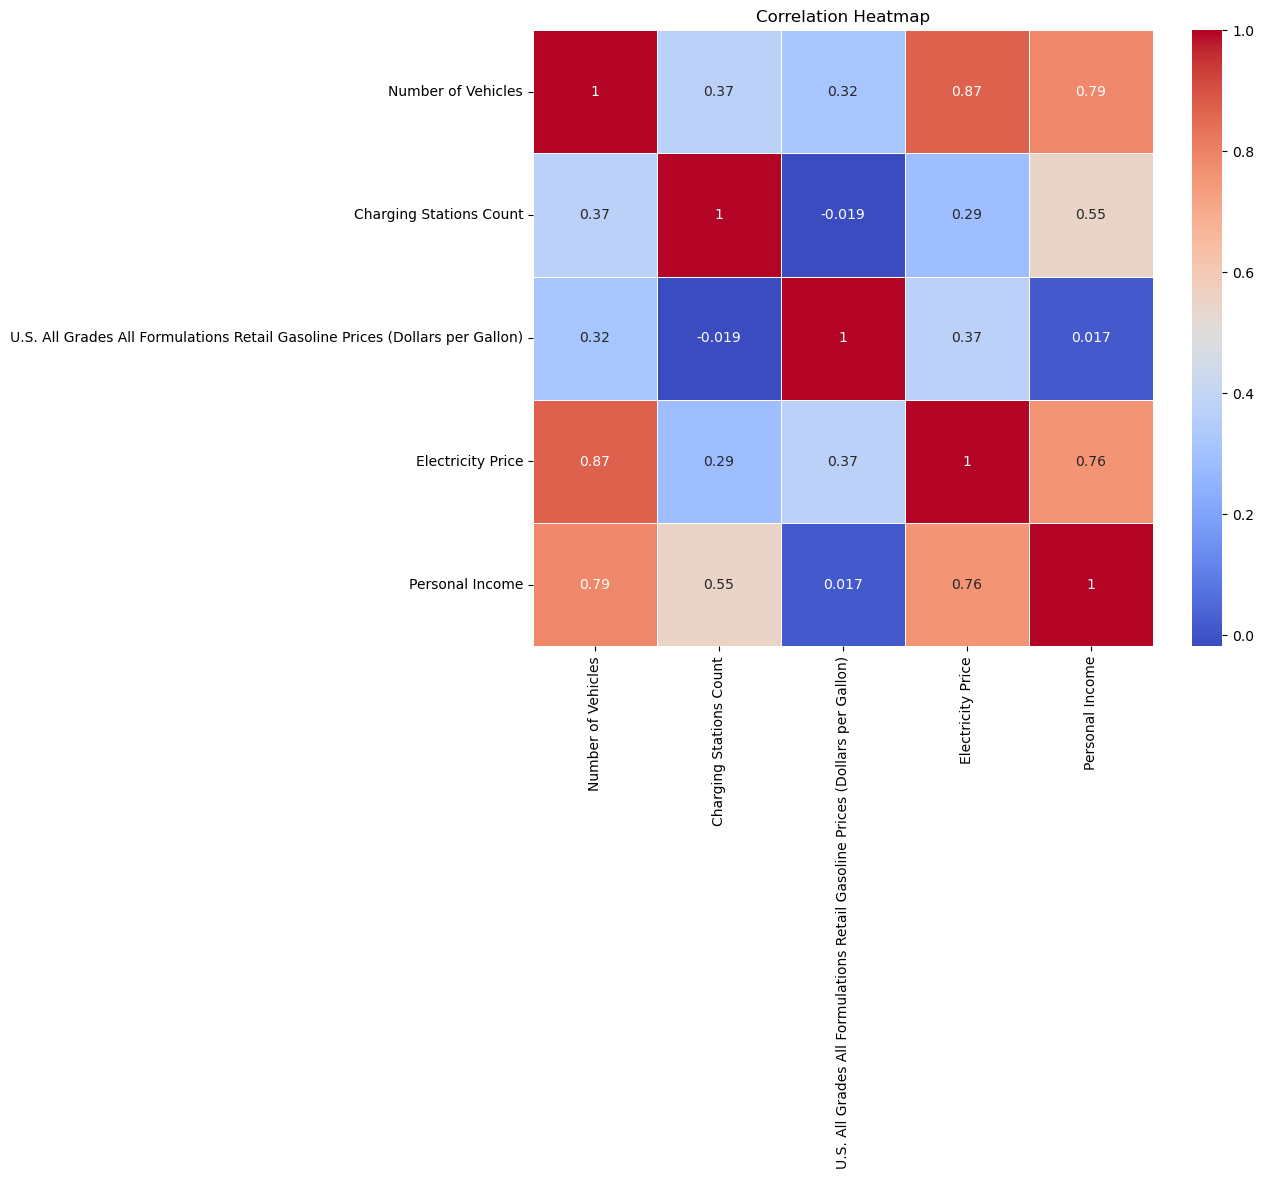

In [15]:
# Select specific columns
selected_columns = ['Number of Vehicles', 
                    'Charging Stations Count', 
                    'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 
                    'Electricity Price', 
                    'Personal Income']

df_selected = merged_df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is d

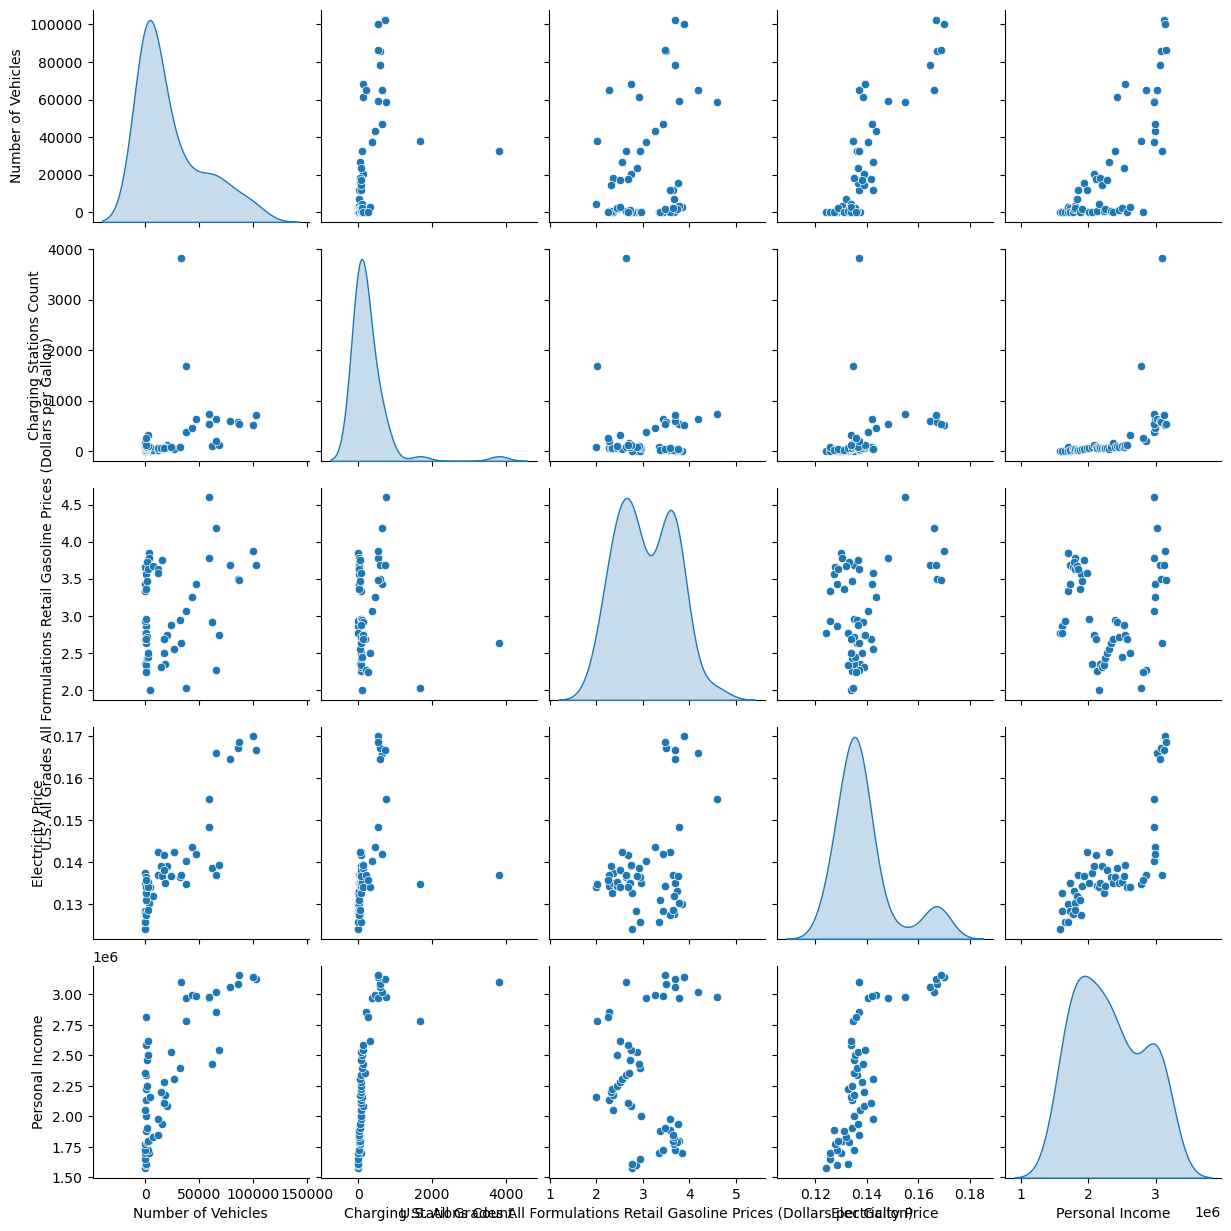

In [16]:
plot=merged_df[[ "Number of Vehicles",
    "Charging Stations Count",
    "U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)",
    "Electricity Price",
    "Personal Income"]]

sns.pairplot(plot, diag_kind='kde')
plt.show()

Mean Squared Error: 145786045.3078234


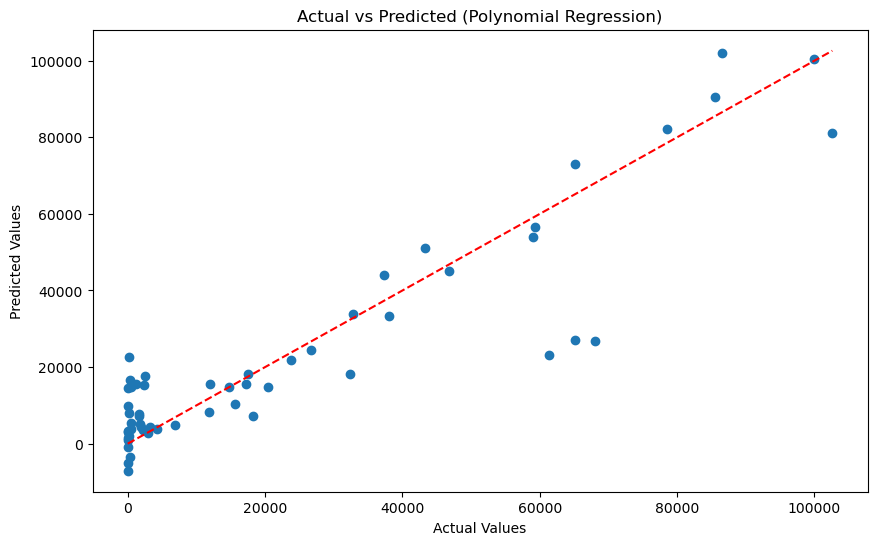

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

independent_vars = [
    'Charging Stations Count',
    'Electricity Price',
    'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',
    'Personal Income'
]
dependent_var = 'Number of Vehicles'

X = merged_df[independent_vars]
y = merged_df[dependent_var]

# 2nd order polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predictions and reviews
predictions = model.predict(X_poly)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

# Scatter plot of prediction and reality
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.show()


SARIMA to forecast EVs sales sales(should i use this)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
train_size = int(len(merged_df) * 0.9)
train, test = merged_df['Number of Vehicles'][:train_size], merged_df['Number of Vehicles'][train_size:]

# Train SARIMA model and fine-tune parameters
best_rmse = float('inf')
best_model = None

for p in range(1, 3):  # Adjust based on your dataset and computing resources
    for d in range(1, 3):  # Adjust based on your dataset and computing resources
        for q in range(1, 3):  # Adjust based on your dataset and computing resources
            for P in range(1, 3):  # Adjust based on your dataset and computing resources
                for D in range(1, 3):  # Adjust based on your dataset and computing resources
                    for Q in range(1, 3):  # Adjust based on your dataset and computing resources
                        try:
                            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, 3))
                            results = model.fit()
                            forecast = results.get_forecast(steps=len(test))
                            forecasted_values = forecast.predicted_mean
                            rmse = np.sqrt(mean_squared_error(test, forecasted_values))
                            
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_model = model
                                best_params = (p, d, q, P, D, Q)
                            
                        except:
                            continue

# Evaluate the best model found
forecast = best_model.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Number of Vehicles'], label='Observed')
plt.plot(test.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Print best parameters and performance metrics
print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)
print("Best MAE:", mean_absolute_error(test, forecasted_values))

merged_df1 = merged_df[['Number of Vehicles','Forecast']].iloc[50:].reset_index()
merged_df1['Acc'] = 0
for i in range(len(merged_df1)):
    merged_df1['Acc'][i] = abs((merged_df1['Number of Vehicles'][i]/merged_df1['Forecast'][i]))

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17408D+01    |proj g|=  8.84190D-01

At iterate    5    f=  1.03777D+01    |proj g|=  9.31868D-02

At iterate   10    f=  1.03523D+01    |proj g|=  2.33899D-02

At iterate   15    f=  1.03462D+01    |proj g|=  2.22060D-02

At iterate   20    f=  1.03418D+01    |proj g|=  7.62711D-03

At iterate   25    f=  1.03412D+01    |proj g|=  6.38144D-03

At iterate   30    f=  1.03411D+01    |proj g|=  1.54920D-03

At iterate   35    f=  1.03410D+01    |proj g|=  2.51529D-04

At iterate   40    f=  1.03346D+01    |proj g|=  3.30986D-02

At iterate   45    f=  1.03237D+01    |proj g|=  3.17710D-02

At iterate   50    f=  1.03208D+01    |proj g|=  8.27100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.03251D+01    |proj g|=  3.24732D-02

At iterate   10    f=  1.03143D+01    |proj g|=  4.65147D-03

At iterate   15    f=  1.03117D+01    |proj g|=  1.56727D-03

At iterate   20    f=  1.03113D+01    |proj g|=  3.94600D-03

At iterate   25    f=  1.03112D+01    |proj g|=  1.92533D-03

At iterate   30    f=  1.03112D+01    |proj g|=  1.57457D-04

At iterate   35    f=  1.03102D+01    |proj g|=  8.49691D-03

At iterate   40    f=  1.03007D+01    |proj g|=  1.47306D-02

At iterate   45    f=  1.02974D+01    |proj g|=  2.02577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     53   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.00890D+01    |proj g|=  1.44065D-02

At iterate   10    f=  1.00849D+01    |proj g|=  6.14055D-04

At iterate   15    f=  1.00848D+01    |proj g|=  1.36506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.365D-05   1.008D+01
  F =   10.084840960681396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06764D+01    |proj g|=  6.06038D-01

At iterate    5    f=  1.00944D+01    |proj g|=  8.94030D-03

At iterate   10    f=  1.00921D+01    |proj g|=  4.66961D-04

At iterate   15    f=  1.00920D+01    |proj g|=  4.42631D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     19      1     0     0   1.328D-05   1.009D+01
  F =   10.091990187217682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.02180D+01    |proj g|=  1.24212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   1.692D-05   1.022D+01
  F =   10.217953823177451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29671D+01    |proj g|=  5.70657D+00


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.03443D+01    |proj g|=  1.27269D-01

At iterate   10    f=  1.03110D+01    |proj g|=  1.31070D-02

At iterate   15    f=  1.03091D+01    |proj g|=  1.12400D-02

At iterate   20    f=  1.03071D+01    |proj g|=  4.49864D-03

At iterate   25    f=  1.03067D+01    |proj g|=  4.20453D-03

At iterate   30    f=  1.03066D+01    |proj g|=  8.47450D-05

At iterate   35    f=  1.03066D+01    |proj g|=  2.81115D-04

At iterate   40    f=  1.03066D+01    |proj g|=  1.96342D-04

At iterate   45    f=  1.03021D+01    |proj g|=  1.72669D-02

At iterate   50    f=  1.03007D+01    |proj g|=  1.23601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.00334D+01    |proj g|=  4.33700D-02

At iterate   10    f=  1.00250D+01    |proj g|=  7.03096D-03

At iterate   15    f=  1.00245D+01    |proj g|=  1.99287D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   1.632D-05   1.002D+01
  F =   10.024489853250621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07238D+01    |proj g|=  1.29339D+00

At iterate    5    f=  1.00859D+01    |proj g|=  1.75415D-02

At iterate   10    f=  1.00296D+01    |proj g|=  2.48177D-02

At iterate   15    f=  1.00212D+01    |proj g|=  1.62047D-02

At iterate   20    f=  1.00200D+01    |proj g|=  5.89791D-04

At iterate   25    f=  1.00200D+01    |proj g|=  2.47801D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     30      1     0     0   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


At iterate   10    f=  1.05525D+01    |proj g|=  3.70800D-03

At iterate   15    f=  1.05513D+01    |proj g|=  5.24814D-03

At iterate   20    f=  1.05506D+01    |proj g|=  6.18538D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   1.977D-05   1.055D+01
  F =   10.550548721299217     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07937D+01    |proj g|=  6.61770D-01

At iterate    5    f=  1.05486D+01    |proj g|=  1.00739D-02

At iterate   10    f=  1.05403D+01    |proj g|=  1.73501D-02

At iterate   15    f=  1.05335D+01    |proj g|=  2.18482D-03

At iterate   20    f=  1.05334D+01    |proj g|=  2.08688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     24      1     0     0   2.087D-05   1.053D+01
  F =   10.533402081660746     

CONVERG

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.02466D+01    |proj g|=  3.05314D-03

At iterate   20    f=  1.02465D+01    |proj g|=  4.60529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   1.269D-05   1.025D+01
  F =   10.246482096053414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04950D+01    |proj g|=  6.37876D-01

At iterate    5    f=  1.02545D+01    |proj g|=  1.41016D-02


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.02458D+01    |proj g|=  7.09316D-03

At iterate   15    f=  1.02406D+01    |proj g|=  3.25591D-03

At iterate   20    f=  1.02403D+01    |proj g|=  2.86416D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     22      1     0     0   1.287D-05   1.024D+01
  F =   10.240322136689629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06725D+01    |proj g|=  2.10652D-01

At iterate    5    f=  1.05221D+01    |proj g|=  1.68042D-02

At iterate   10    f=  1.05155D+01    |proj g|=  1.05440D-02

At iterate   15    f=  1.05111D+01    |proj g|=  2.00773D-03

At iterate   20    f=  1.05109D+01    |proj g|=  1.66961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     24      1     0     0   2.229D-05   1.051D+01
  F =   10.510878087337874     

CONVERG

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.05511D+01    |proj g|=  6.44390D-03

At iterate   15    f=  1.05484D+01    |proj g|=  2.30611D-02

At iterate   20    f=  1.05333D+01    |proj g|=  4.95447D-02

At iterate   25    f=  1.05161D+01    |proj g|=  1.81863D-02

At iterate   30    f=  1.05130D+01    |proj g|=  3.89194D-03

At iterate   35    f=  1.05109D+01    |proj g|=  1.52209D-03

At iterate   40    f=  1.05109D+01    |proj g|=  1.38834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     52      1     0     0   1.388D-04   1.051D+01
  F =   10.510870349980101     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.01978D+01    |proj g|=  9.75516D-03

At iterate   20    f=  1.01966D+01    |proj g|=  1.75134D-03

At iterate   25    f=  1.01964D+01    |proj g|=  1.07399D-03

At iterate   30    f=  1.01964D+01    |proj g|=  4.00068D-04

At iterate   35    f=  1.01964D+01    |proj g|=  1.54656D-04
  ys=-1.160E-05  -gs= 6.434E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     58      1     1     0   4.559D-04   1.020D+01
  F =   10.196358735906138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03185D+01    |proj g|=  9.63347D-02

At iterate    5    f=  1.02470D+01    |proj g|=  4.95173D-02

At iterate   10    f=  1.02033D+01    |proj g|=  6.41509D-03

At iterate   15    f=  1.01987D+01    |proj g|=  6.70626D-03

At iterate   20    f=  1.01975D+01    |proj g|=  6.05464D-03

At iterate   25    f=  1.01966D+01    |proj g|=  1.06935D-02

At iterate   30    f=  1.01962D+01    |proj g|=  1.68983D-03

At iterate   35    f=  1.01960D+01    |proj g|=  1.57716D-03

At iterate   40    f=  1.01960D+01    |proj g|=  2.44309D-04

At iterate   45    f=  1.01960D+01    |proj g|=  2.95294D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     81      1     0     0   2.738D-04   1.020D+01
  F =   10.195973380666508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20233D+01    |proj g|=  2.62025D+00

At iterate    5    f=  1.06378D+01    |proj g|=  2.33562D-02

At iterate   10    f=  1.06223D+01    |proj g|=  2.94933D-03

At iterate   15    f=  1.06218D+01    |proj g|=  3.06312D-04

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03608D+01    |proj g|=  1.09955D-01

At iterate    5    f=  1.02954D+01    |proj g|=  1.28135D-03

At iterate   10    f=  1.02953D+01    |proj g|=  4.80943D-04

At iterate   15    f=  1.02953D+01    |proj g|=  2.04565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     19      1     0     0   8.608D-06   1.030D+01
  F =   10.295286516069892     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.05978D+01    |proj g|=  4.09458D-02

At iterate   10    f=  1.04924D+01    |proj g|=  1.52855D-01

At iterate   15    f=  1.04481D+01    |proj g|=  9.13310D-03

At iterate   20    f=  1.04458D+01    |proj g|=  9.93734D-03

At iterate   25    f=  1.04418D+01    |proj g|=  1.71889D-02

At iterate   30    f=  1.04411D+01    |proj g|=  1.72671D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     36      1     0     0   1.727D-05   1.044D+01
  F =   10.441123093633703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.04984D+01    |proj g|=  9.66255D-03

At iterate   20    f=  1.04517D+01    |proj g|=  2.24644D-02

At iterate   25    f=  1.04433D+01    |proj g|=  6.72780D-03

At iterate   30    f=  1.04411D+01    |proj g|=  1.06874D-02

At iterate   35    f=  1.04411D+01    |proj g|=  1.38823D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     51      1     0     0   1.752D-05   1.044D+01
  F =   10.441043935412051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.02443D+01    |proj g|=  8.55303D-03

At iterate   15    f=  1.02324D+01    |proj g|=  1.24946D-02

At iterate   20    f=  1.02311D+01    |proj g|=  4.11329D-03

At iterate   25    f=  1.02310D+01    |proj g|=  1.55552D-03

At iterate   30    f=  1.02309D+01    |proj g|=  1.87251D-03

At iterate   35    f=  1.02309D+01    |proj g|=  1.03042D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     43      1     0     0   1.017D-05   1.023D+01
  F =   10.230868599544886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  1.02301D+01    |proj g|=  3.45144D-04

At iterate   25    f=  1.02300D+01    |proj g|=  9.89665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     31      1     0     0   1.063D-05   1.023D+01
  F =   10.230035471744772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09405D+01    |proj g|=  3.60073D-01

At iterate    5    f=  1.07093D+01    |proj g|=  3.72871D-02


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.06977D+01    |proj g|=  9.75023D-03

At iterate   15    f=  1.06935D+01    |proj g|=  1.04832D-03

At iterate   20    f=  1.06933D+01    |proj g|=  5.23869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     25      1     0     0   1.181D-05   1.069D+01
  F =   10.693251659530125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09805D+01    |proj g|=  8.39942D-01

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.06457D+01    |proj g|=  6.48463D-03

At iterate   15    f=  1.06399D+01    |proj g|=  8.83939D-04

At iterate   20    f=  1.06398D+01    |proj g|=  4.41560D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     22      1     0     0   1.454D-05   1.064D+01
  F =   10.639783879372436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06227D+01    |proj g|=  7.53854D-01

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.03086D+01    |proj g|=  1.89777D-02

At iterate   15    f=  1.03015D+01    |proj g|=  3.48100D-03

At iterate   20    f=  1.03003D+01    |proj g|=  3.05138D-03

At iterate   25    f=  1.02999D+01    |proj g|=  2.30752D-04

At iterate   30    f=  1.02999D+01    |proj g|=  1.64642D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   8.738D-06   1.030D+01
  F =   10.299924581110425     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.03055D+01    |proj g|=  1.30638D-02

At iterate   10    f=  1.02966D+01    |proj g|=  1.27399D-02

At iterate   15    f=  1.02931D+01    |proj g|=  1.55917D-03

At iterate   20    f=  1.02926D+01    |proj g|=  3.04300D-04

At iterate   25    f=  1.02926D+01    |proj g|=  1.89907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     31      1     0     0   8.921D-06   1.029D+01
  F =   10.292555553613104     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


At iterate   15    f=  1.06112D+01    |proj g|=  1.84286D-02

At iterate   20    f=  1.06094D+01    |proj g|=  6.52897D-03

At iterate   25    f=  1.06090D+01    |proj g|=  1.60394D-03

At iterate   30    f=  1.06090D+01    |proj g|=  1.66546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   1.665D-05   1.061D+01
  F =   10.608962613168988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At itera

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.07098D+01    |proj g|=  5.53515D-02

At iterate   10    f=  1.06311D+01    |proj g|=  8.74886D-02

At iterate   15    f=  1.06142D+01    |proj g|=  2.15007D-02

At iterate   20    f=  1.06107D+01    |proj g|=  5.97830D-03

At iterate   25    f=  1.06093D+01    |proj g|=  4.52731D-03

At iterate   30    f=  1.06089D+01    |proj g|=  7.46882D-04

At iterate   35    f=  1.06089D+01    |proj g|=  1.40045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     42      1     0     0   1.580D-05   1.061D+01
  F =   10.608915393765169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.02529D+01    |proj g|=  9.80399D-03

At iterate   15    f=  1.02413D+01    |proj g|=  2.51131D-02

At iterate   20    f=  1.02385D+01    |proj g|=  4.94467D-03

At iterate   25    f=  1.02365D+01    |proj g|=  3.19729D-03

At iterate   30    f=  1.02361D+01    |proj g|=  5.59296D-04

At iterate   35    f=  1.02361D+01    |proj g|=  8.39410D-05

At iterate   40    f=  1.02360D+01    |proj g|=  1.12458D-03

At iterate   45    f=  1.02359D+01    |proj g|=  6.08335D-04
  ys=-3.139E-05  -gs= 1.527E-05 BFGS update SKIPPED

At iterate   50    f=  1.02359D+01    |proj g|=  1.31035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.02906D+01    |proj g|=  3.55542D-02

At iterate   10    f=  1.02498D+01    |proj g|=  2.07444D-02

At iterate   15    f=  1.02396D+01    |proj g|=  4.33628D-03

At iterate   20    f=  1.02363D+01    |proj g|=  2.64424D-03

At iterate   25    f=  1.02355D+01    |proj g|=  5.62827D-03

At iterate   30    f=  1.02351D+01    |proj g|=  6.75310D-04

At iterate   35    f=  1.02350D+01    |proj g|=  7.71946D-04

At iterate   40    f=  1.02350D+01    |proj g|=  1.96695D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     64      1     0     0   2.436D-04   1.024D+01
  F =   10.235018941197104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21784D+01    |proj g|=  2.84167D+00

At iterate    5    f=  9.99470D+00    |proj g|=  5.16113D-02

At iterate   10    f=  9.98446D+00    |proj g|=  8.52301D-03

At iterate   15    f=  9.98356D+00    |proj g|=  5.80219D-04

       

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  9.98330D+00    |proj g|=  2.08210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     26      1     0     0   7.532D-05   9.983D+00
  F =   9.9832976766497517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19278D+01    |proj g|=  2.89626D+00

At iterate    5    f=  9.56177D+00    |proj g|=  7.88926D-02

At iterate   10    f=  9.52392D+00    |proj g|=  6.73569D-03


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  9.52253D+00    |proj g|=  4.02470D-03

At iterate   20    f=  9.52177D+00    |proj g|=  1.12268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   8.345D-05   9.522D+00
  F =   9.5217721069023291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18527D+01    |proj g|=  3.11438D+00

At iterate    5    f=  9.70193D+00    |proj g|=  3.08399D-01

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  9.50066D+00    |proj g|=  4.66132D-02

At iterate   20    f=  9.49768D+00    |proj g|=  9.04591D-03

At iterate   25    f=  9.49700D+00    |proj g|=  1.74405D-03

At iterate   30    f=  9.49699D+00    |proj g|=  2.52090D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     38      1     0     0   2.323D-05   9.497D+00
  F =   9.4969911947612928     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18715D+01    |proj g|=  2.40172D+00

At iterate    5    f=  1.01877D+01    |proj g|=  2.60974D-01

At iterate   10    f=  1.00044D+01    |proj g|=  5.15843D-02

At iterate   15    f=  9.99003D+00    |proj g|=  9.32002D-02

At iterate   20    f=  9.98390D+00    |proj g|=  1.96337D-02

At iterate   25    f=  9.98324D+00    |proj g|=  4.30869D-03

At iterate   30    f=  9.98323D+00    |proj g|=  1.26543D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.00323D+01    |proj g|=  2.69200D-01

At iterate   15    f=  1.00234D+01    |proj g|=  8.04136D-03

At iterate   20    f=  9.99702D+00    |proj g|=  1.39708D-01

At iterate   25    f=  9.98404D+00    |proj g|=  1.48189D-02

At iterate   30    f=  9.98319D+00    |proj g|=  9.92387D-03

At iterate   35    f=  9.98238D+00    |proj g|=  3.03728D-03

At iterate   40    f=  9.98235D+00    |proj g|=  8.50354D-04

At iterate   45    f=  9.98181D+00    |proj g|=  9.40619D-02

At iterate   50    f=  9.97974D+00    |proj g|=  1.20659D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18925D+01    |proj g|=  2.83802D+00

At iterate    5    f=  9.71105D+00    |proj g|=  2.43030D-01

At iterate   10    f=  9.53587D+00    |proj g|=  1.67220D-02

At iterate   15    f=  9.50230D+00    |proj g|=  1.36618D-01

At iterate   20    f=  9.49810D+00    |proj g|=  5.10439D-02

At iterate   25    f=  9.49509D+00    |proj g|=  3.49594D-03

At iterate   30    f=  9.49412D+00    |proj g|=  2.21925D-03

At iterate   35    f=  9.49395D+00    |proj g|=  1.08361D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  9.54890D+00    |proj g|=  4.08851D-02

At iterate   15    f=  9.50521D+00    |proj g|=  2.34803D-01

At iterate   20    f=  9.49917D+00    |proj g|=  2.82420D-02

At iterate   25    f=  9.49464D+00    |proj g|=  1.55913D-02

At iterate   30    f=  9.49157D+00    |proj g|=  8.90854D-03

At iterate   35    f=  9.49120D+00    |proj g|=  1.12836D-04

At iterate   40    f=  9.49120D+00    |proj g|=  7.99615D-04

At iterate   45    f=  9.49119D+00    |proj g|=  4.83601D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     53      1     0     0   3.910D-05   9.491D+00
  F =   9.49119389529

 This problem is unconstrained.



At iterate   10    f=  1.03993D+01    |proj g|=  8.05120D-03

At iterate   15    f=  1.03951D+01    |proj g|=  4.93742D-03

At iterate   20    f=  1.03946D+01    |proj g|=  2.75079D-04

At iterate   25    f=  1.03946D+01    |proj g|=  3.34633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     38      1     0     0   5.416D-05   1.039D+01
  F =   10.394596694664470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.04425D+01    |proj g|=  2.37670D-02

At iterate   10    f=  1.04053D+01    |proj g|=  1.03491D-01

At iterate   15    f=  1.03971D+01    |proj g|=  1.31896D-02

At iterate   20    f=  1.03948D+01    |proj g|=  5.35368D-03

At iterate   25    f=  1.03945D+01    |proj g|=  3.21014D-03

At iterate   30    f=  1.03945D+01    |proj g|=  3.85455D-03

At iterate   35    f=  1.03945D+01    |proj g|=  1.14163D-04

At iterate   40    f=  1.03945D+01    |proj g|=  2.64075D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     47      1     0     0   2.641D-05   1.039D+01
  F =   10.3944601182

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.01551D+01    |proj g|=  3.07978D-04

At iterate   25    f=  1.01551D+01    |proj g|=  2.68517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     31      1     0     0   3.563D-05   1.016D+01
  F =   10.155081608535156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04471D+01    |proj g|=  5.38534D-01


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.02111D+01    |proj g|=  9.13479D-02

At iterate   10    f=  1.01561D+01    |proj g|=  2.59228D-02

At iterate   15    f=  1.01527D+01    |proj g|=  1.86794D-03

At iterate   20    f=  1.01518D+01    |proj g|=  8.20738D-03

At iterate   25    f=  1.01517D+01    |proj g|=  1.34494D-03

At iterate   30    f=  1.01516D+01    |proj g|=  2.11251D-03

At iterate   35    f=  1.01516D+01    |proj g|=  3.75346D-04

At iterate   40    f=  1.01515D+01    |proj g|=  7.18091D-03

At iterate   45    f=  1.01515D+01    |proj g|=  3.62800D-04

At iterate   50    f=  1.01515D+01    |proj g|=  1.55547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.



At iterate   10    f=  1.04325D+01    |proj g|=  2.76137D-02

At iterate   15    f=  1.04055D+01    |proj g|=  2.55224D-02

At iterate   20    f=  1.04030D+01    |proj g|=  7.13762D-03

At iterate   25    f=  1.04009D+01    |proj g|=  1.64887D-02

At iterate   30    f=  1.04004D+01    |proj g|=  1.36737D-02

At iterate   35    f=  1.03966D+01    |proj g|=  3.22239D-02

At iterate   40    f=  1.03954D+01    |proj g|=  2.24580D-03

At iterate   45    f=  1.03953D+01    |proj g|=  8.92413D-03


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.



At iterate   50    f=  1.03942D+01    |proj g|=  1.55594D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   1.556D-02   1.039D+01
  F =   10.394230642817707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07769D+01    |proj g|=  7.36413D-01

At iterate    5    f=  1.04903D+01    |proj g|=  1.20799D-01

At iterate   10    f=  1.04201D+01    |proj g|=  4.51289D-02

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.02057D+01    |proj g|=  1.88941D-02

At iterate   10    f=  1.01974D+01    |proj g|=  5.03201D-03

At iterate   15    f=  1.01911D+01    |proj g|=  6.34359D-03

At iterate   20    f=  1.01901D+01    |proj g|=  1.26038D-03

At iterate   25    f=  1.01896D+01    |proj g|=  8.26363D-04

At iterate   30    f=  1.01896D+01    |proj g|=  8.83189D-04

At iterate   35    f=  1.01896D+01    |proj g|=  2.90020D-04

At iterate   40    f=  1.01896D+01    |proj g|=  2.27315D-04

At iterate   45    f=  1.01896D+01    |proj g|=  2.62386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     74   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  1.01917D+01    |proj g|=  1.85362D-02

At iterate   20    f=  1.01586D+01    |proj g|=  3.34353D-02

At iterate   25    f=  1.01518D+01    |proj g|=  1.53353D-02

At iterate   30    f=  1.01507D+01    |proj g|=  1.23542D-02

At iterate   35    f=  1.01503D+01    |proj g|=  3.79318D-03

At iterate   40    f=  1.01498D+01    |proj g|=  1.96010D-03

At iterate   45    f=  1.01497D+01    |proj g|=  8.61050D-04

At iterate   50    f=  1.01494D+01    |proj g|=  2.97758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   2.978D-03   1.015D+01
  F =   10.1493778933

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  9.95556D+00    |proj g|=  2.05814D-01

At iterate   15    f=  9.94322D+00    |proj g|=  1.25633D-02

At iterate   20    f=  9.94032D+00    |proj g|=  4.71367D-03

At iterate   25    f=  9.93998D+00    |proj g|=  2.02215D-03

At iterate   30    f=  9.93988D+00    |proj g|=  9.11573D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     32      1     0     0   9.116D-06   9.940D+00
  F =   9.9398832771213215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36907D+01    |proj g|=  4.95486D+00

At iterate    5    f=  1.02146D+01    |proj g|=  4.07640D-01

At iterate   10    f=  9.96164D+00    |proj g|=  5.09290D-02

At iterate   15    f=  9.93219D+00    |proj g|=  1.63733D-01

At iterate   20    f=  9.92693D+00    |proj g|=  1.48569D-02

At iterate   25    f=  9.92438D+00    |proj g|=  3.82712D-02

At iterate   30    f=  9.92342D+00    |proj g|=  4.68571D-04

At iterate   35    f=  9.92342D+00    |proj g|=  7.10429D-04

At iterate   40    f=  9.92341D+00    |proj g|=  1.35412D-02

At iterate   45    f=  9.92331D+00    |proj g|=  8.06275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  9.51053D+00    |proj g|=  6.47577D-02

At iterate   20    f=  9.50973D+00    |proj g|=  6.24485D-03

At iterate   25    f=  9.50872D+00    |proj g|=  2.43122D-03

At iterate   30    f=  9.50866D+00    |proj g|=  7.05467D-04

At iterate   35    f=  9.50854D+00    |proj g|=  5.23661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     44      1     0     0   1.556D-05   9.509D+00
  F =   9.5085431594399346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.00447D+01    |proj g|=  3.29772D-01

At iterate   10    f=  9.48260D+00    |proj g|=  3.65151D-02

At iterate   15    f=  9.45853D+00    |proj g|=  1.34552D-02

At iterate   20    f=  9.45506D+00    |proj g|=  4.00034D-03

At iterate   25    f=  9.45410D+00    |proj g|=  2.27707D-04

At iterate   30    f=  9.45408D+00    |proj g|=  1.54187D-04

At iterate   35    f=  9.45408D+00    |proj g|=  2.86299D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     48      1     0     0   1.895D-04   9.454D+00
  F =   9.4540785249569801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  9.94376D+00    |proj g|=  8.54492D-02

At iterate   20    f=  9.91430D+00    |proj g|=  1.69421D-02

At iterate   25    f=  9.91342D+00    |proj g|=  1.09561D-03

At iterate   30    f=  9.91342D+00    |proj g|=  3.01189D-03

At iterate   35    f=  9.91335D+00    |proj g|=  2.87070D-03

At iterate   40    f=  9.91335D+00    |proj g|=  2.06982D-03

At iterate   45    f=  9.91334D+00    |proj g|=  1.53943D-03

At iterate   50    f=  9.91334D+00    |proj g|=  2.43215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   2.432D-04   9.913D+00
  F =   9.91333820357

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  9.97241D+00    |proj g|=  3.27709D-01

At iterate   15    f=  9.92969D+00    |proj g|=  2.72576D-02

At iterate   20    f=  9.91757D+00    |proj g|=  1.23306D-01

At iterate   25    f=  9.91516D+00    |proj g|=  6.74467D-03

At iterate   30    f=  9.91371D+00    |proj g|=  6.96776D-02

At iterate   35    f=  9.91339D+00    |proj g|=  3.33563D-04

At iterate   40    f=  9.91338D+00    |proj g|=  1.96955D-03

At iterate   45    f=  9.91333D+00    |proj g|=  4.79480D-03

At iterate   50    f=  9.91326D+00    |proj g|=  3.81452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   15    f=  9.45516D+00    |proj g|=  1.41604D-01

At iterate   20    f=  9.44563D+00    |proj g|=  3.57073D-02

At iterate   25    f=  9.44305D+00    |proj g|=  6.58525D-02

At iterate   30    f=  9.44269D+00    |proj g|=  1.21750D-03

At iterate   35    f=  9.44267D+00    |proj g|=  4.37536D-03

At iterate   40    f=  9.44257D+00    |proj g|=  8.48331D-03

At iterate   45    f=  9.44253D+00    |proj g|=  1.14238D-04

At iterate   50    f=  9.44252D+00    |proj g|=  1.21371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   1.214D-03   9.443D+00
  F =   9.44252285304

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


At iterate    5    f=  9.97332D+00    |proj g|=  2.54180D-01

At iterate   10    f=  9.49912D+00    |proj g|=  2.81570D-01

At iterate   15    f=  9.45862D+00    |proj g|=  1.35919D-01

At iterate   20    f=  9.44361D+00    |proj g|=  3.87663D-02

At iterate   25    f=  9.44181D+00    |proj g|=  3.65864D-02

At iterate   30    f=  9.44120D+00    |proj g|=  6.45799D-03

At iterate   35    f=  9.44085D+00    |proj g|=  4.21073D-02

At iterate   40    f=  9.43999D+00    |proj g|=  2.62446D-03

At iterate   45    f=  9.43984D+00    |proj g|=  4.23620D-03


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  9.43979D+00    |proj g|=  7.06163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   7.062D-04   9.440D+00
  F =   9.4397898563948175     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09372D+01    |proj g|=  3.29871D-01

At iterate    5    f=  1.07045D+01    |proj g|=  1.74310D-02

At iterate   10    f=  1.06818D+01    |proj g|=  7.57758D-03

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   20    f=  1.05212D+01    |proj g|=  1.45576D-03

At iterate   25    f=  1.05210D+01    |proj g|=  5.03234D-03

At iterate   30    f=  1.05206D+01    |proj g|=  2.51293D-03

At iterate   35    f=  1.05206D+01    |proj g|=  5.51287D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     47      1     0     0   6.363D-05   1.052D+01
  F =   10.520584323913118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.03215D+01    |proj g|=  3.85190D-02

At iterate   10    f=  1.03038D+01    |proj g|=  1.28394D-02

At iterate   15    f=  1.03011D+01    |proj g|=  3.29236D-03

At iterate   20    f=  1.02984D+01    |proj g|=  2.08291D-03

At iterate   25    f=  1.02979D+01    |proj g|=  4.09070D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   8.771D-06   1.030D+01
  F =   10.297891099041186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04243D+01    |proj g|=  3.50992D-01

At iterate    5    f=  1.03046D+01    |proj g|=  1.34275D-02

At iterate   10    f=  1.02946D+01    |proj g|=  1.42122D-02

At iterate   15    f=  1.02916D+01    |proj g|=  2.83520D-03

At iterate   20    f=  1.02907D+01    |proj g|=  6.57290D-04

At iterate   25    f=  1.02907D+01    |proj g|=  1.03039D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     31      1     0     0   

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09867D+01    |proj g|=  5.97324D-01

At iterate    5    f=  1.06797D+01    |proj g|=  2.51187D-02

At iterate   10    f=  1.05953D+01    |proj g|=  3.77176D-02

At iterate   15    f=  1.05924D+01    |proj g|=  6.04647D-03

At iterate   20    f=  1.05870D+01    |proj g|=  1.25743D-02

At iterate   25    f=  1.05858D+01    |proj g|=  1.04108D-03

At iterate   30    f=  1.05852D+01    |proj g|=  1.98398D-03

At iterate   35    f=  1.05852D+01    |proj g|=  1.96519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   10    f=  1.06098D+01    |proj g|=  1.26576D-01

At iterate   15    f=  1.05936D+01    |proj g|=  5.97750D-02

At iterate   20    f=  1.05882D+01    |proj g|=  8.62341D-03

At iterate   25    f=  1.05866D+01    |proj g|=  2.37616D-03

At iterate   30    f=  1.05853D+01    |proj g|=  1.58135D-03

At iterate   35    f=  1.05852D+01    |proj g|=  6.86864D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38     46      1     0     0   2.222D-05   1.059D+01
  F =   10.585184539364031     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate    5    f=  1.03351D+01    |proj g|=  4.59291D-02

At iterate   10    f=  1.02604D+01    |proj g|=  8.41354D-02

At iterate   15    f=  1.02496D+01    |proj g|=  1.50284D-02

At iterate   20    f=  1.02405D+01    |proj g|=  1.27661D-02

At iterate   25    f=  1.02378D+01    |proj g|=  1.71145D-03

At iterate   30    f=  1.02355D+01    |proj g|=  2.43735D-03

At iterate   35    f=  1.02348D+01    |proj g|=  2.43849D-03

At iterate   40    f=  1.02346D+01    |proj g|=  2.50702D-04

At iterate   45    f=  1.02346D+01    |proj g|=  9.38980D-04


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.



At iterate   50    f=  1.02345D+01    |proj g|=  1.36016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   1.360D-03   1.023D+01
  F =   10.234539668047541     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04927D+01    |proj g|=  4.47179D-01

At iterate    5    f=  1.02905D+01    |proj g|=  3.24802D-02

At iterate   10    f=  1.02513D+01    |proj g|=  3.39977D-02

At iter

AttributeError: 'SARIMAX' object has no attribute 'get_forecast'

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20233D+01    |proj g|=  2.62025D+00

At iterate    5    f=  1.06378D+01    |proj g|=  2.33562D-02

At iterate   10    f=  1.06223D+01    |proj g|=  2.94933D-03

At iterate   15    f=  1.06218D+01    |proj g|=  3.06312D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     20      1     0     0   6.418D-06   1.062D+01
  F =   10.621798384942888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


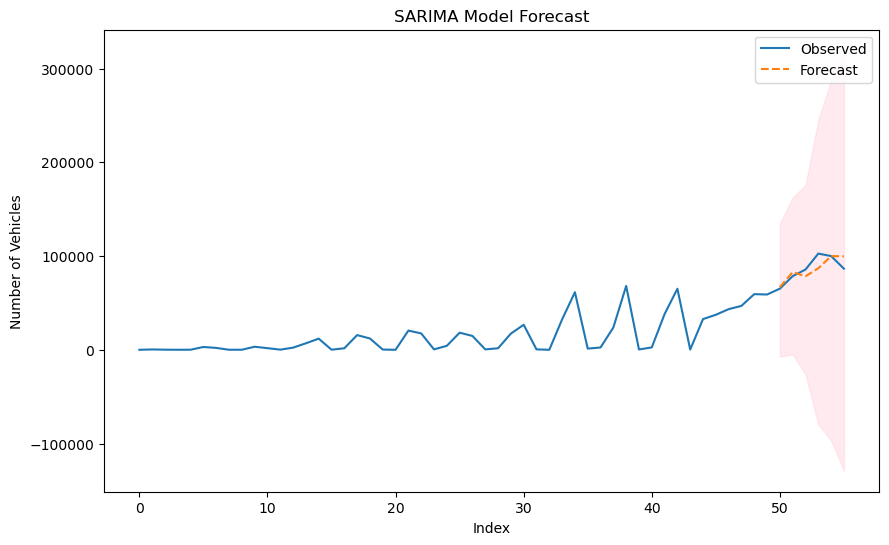

RMSE: 10079.046834928791
MAE: 7660.058447743737


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

y = merged_df['Number of Vehicles']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(y) * 0.9)
train, test = y[:train_size], y[train_size:]

# Train SARIMA model
model = SARIMAX(train, order=(1, 2, 1), seasonal_order=(1, 1, 1, 3))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Append the prediction column to the original DataFrame
merged_df['Forecast'] = np.nan  # Tạo một cột mới cho dự đoán
merged_df.iloc[train_size:, merged_df.columns.get_loc('Forecast')] = forecast.predicted_mean*1.05

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['Number of Vehicles'], label='Observed')
plt.plot(merged_df.index[train_size:], merged_df['Forecast'].iloc[train_size:], label='Forecast', linestyle='--')
plt.fill_between(merged_df.index[train_size:], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.xlabel('Index')  # Đổi tên trục x nếu không có cột ngày
plt.ylabel('Number of Vehicles')
plt.title('SARIMA Model Forecast')
plt.show()

# RMSE and  MAE
forecasted_values = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(test, forecasted_values))
mae = mean_absolute_error(test, forecasted_values)
print("RMSE:", rmse)
print("MAE:", mae)

## Forecasting

In [ ]:
merged_df.columns

In [ ]:

total = merged_df['Number of Vehicles'].sum()
total


In [ ]:
merged_df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features and Target
X = merged_df[['Charging Stations Count', 'Electricity Price', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Personal Income']]
Y = merged_df['Number of Vehicles']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_scaled, Y)
linear_predictions = linear_model.predict(X_scaled)
linear_rmse = np.sqrt(mean_squared_error(Y, linear_predictions))
linear_mae = mean_absolute_error(Y, linear_predictions)
print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression MAE:", linear_mae)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_scaled, Y)
best_ridge = ridge_grid.best_estimator_
ridge_predictions = best_ridge.predict(X_scaled)
ridge_rmse = np.sqrt(mean_squared_error(Y, ridge_predictions))
ridge_mae = mean_absolute_error(Y, ridge_predictions)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Best Ridge Params:", ridge_grid.best_params_)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_scaled, Y)
best_lasso = lasso_grid.best_estimator_
lasso_predictions = best_lasso.predict(X_scaled)
lasso_rmse = np.sqrt(mean_squared_error(Y, lasso_predictions))
lasso_mae = mean_absolute_error(Y, lasso_predictions)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression MAE:", lasso_mae)
print("Best Lasso Params:", lasso_grid.best_params_)

model_performance = {
    'Linear Regression': {'RMSE': linear_rmse, 'model': linear_model},
    'Ridge Regression': {'RMSE': ridge_rmse, 'model': best_ridge},
    'Lasso Regression': {'RMSE': lasso_rmse, 'model': best_lasso}
}

best_model_name = min(model_performance, key=lambda x: model_performance[x]['RMSE'])
best_model = model_performance[best_model_name]['model']

print(f"Best Model: {best_model_name}")

In [ ]:
import pandas as pd
from sklearn import linear_model

pd.set_option('display.float_format', lambda x: '%.10f' % x)
np.set_printoptions(suppress=True)

# Prepare the feature matrix (X) and target vector (Y)
X = merged_df[['Charging Stations Count', 'Electricity Price', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Personal Income']]
Y = merged_df['Number of Vehicles']

# Initialize the linear regression model
regr = linear_model.LinearRegression()

# Fit the model with the data
regr.fit(X, Y)

# Print the coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

# Make predictions
predictions = regr.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(Y, predictions, squared=False)
mae = mean_absolute_error(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)


In [ ]:
equation = f"Number of Vehicles = {regr.intercept_:.2f} + {regr.coef_[0]:.2f} * merged_df['Charging Stations Count'] + {regr.coef_[1]:.2f} * merged_df['Electricity Price'] + {regr.coef_[2]:.2f} * merged_df['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'] + {regr.coef_[3]:.2f} * merged_df['Personal Income']"

equation

## Baseline Scenario:  2.4 million ZEVs in 2030; 4 million in 2045 (13% ZEV fleet)



In [ ]:
# Assume the number of electric vehicles from the scenarios
ev_2030 = 2400000
ev_2045 = 4000000

# Assume each charging station serves an average of 100 vehicles per day
average_usage_per_station_per_day = 100

# Calculate the number of charging stations required
stations_needed_2030 = ev_2030 / average_usage_per_station_per_day
stations_needed_2045 = ev_2045 / average_usage_per_station_per_day

print("Public stations needed by 2030:", stations_needed_2030)
print("Public stations needed by 2045:", stations_needed_2045)


## Scenario 2: Reach 100% sales by 2035:  14.2 million ZEVs in 2035; 27.9 million in 2045 (85% ZEV fleet) 



In [ ]:
# Assume the number of electric vehicles from the scenarios
ev_2035 = 14000000
ev_2045 = 27900000

# Assume each charging station serves an average of 100 vehicles per day
average_usage_per_station_per_day = 100

# Calculate the number of charging stations required
stations_needed_2030 = ev_2030 / average_usage_per_station_per_day
stations_needed_2045 = ev_2045 / average_usage_per_station_per_day

print("Public stations needed by 2030:", stations_needed_2030)
print("Public stations needed by 2045:", stations_needed_2045)


## Scenario 3: Reach 100% sales by 2030: 10.6 million ZEVs in 2030; 33 million in 2045 (100% ZEV fleet)

In [ ]:
# Assume number of EVs
ev_2030 = 10600000
ev_2045 = 33000000

# Assume each charging station serves an average of 100 vehicles per day
average_usage_per_station_per_day = 100

# Calculate the number of charging stations required
stations_needed_2030 = ev_2030 / average_usage_per_station_per_day
stations_needed_2045 = ev_2045 / average_usage_per_station_per_day

print("Public stations needed by 2030:", stations_needed_2030)
print("Public stations needed by 2045:", stations_needed_2045)
